In [1]:
import os
from skimage import io, exposure, filters, restoration, img_as_float
import matplotlib.pyplot as plt
from skimage.util import img_as_ubyte

In [3]:
root_dir = 'aquarium_pretrain' # Double check this is correct since adding to the VM

splits = ['train', 'test','valid']

input_dir = os.path.join(root_dir, 'train', 'images')
output_dir = os.path.join(root_dir, 'train', 'enhanced_images')

os.makedirs(output_dir, exist_ok=True)

In [4]:
max_images = 10
processed_count = 0

for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Check for valid image formats
        img_path = os.path.join(input_dir, filename)
        
        # Load image
        img = io.imread(img_path)
        img = img_as_float(img)
        
        # Contrast Adjustment
        img_contrast = exposure.rescale_intensity(img, in_range='image', out_range=(0, 1)) #change out_range to be 0,1 or 0,255 depending
        
        # histogram equalization
        img_equalized = exposure.equalize_adapthist(img_contrast, clip_limit=0.03)
        
        # denoising
        img_denoised = restoration.denoise_wavelet(img_equalized, channel_axis=-1)
        
        # sharpening (Edge Enhancement)
        img_sharpened = filters.unsharp_mask(img_denoised, radius=1, amount=1)
        # enhanced image = original + amount * (original - blurred)
        
        output_path = os.path.join(output_dir, filename) #save

        # Convert image to uint8 before saving
        img_to_save = img_as_ubyte(img_sharpened)
        io.imsave(output_path, img_to_save)
        
        if processed_count%10 == 0:
            print(f"Processed {processed_count} images")

        processed_count += 1
        # if processed_count >= max_images:
        #     print(f"Processed {max_images} images")
        #     break

Processed 0 images
Processed 10 images
Processed 20 images
Processed 30 images
Processed 40 images
Processed 50 images
Processed 60 images
Processed 70 images
Processed 80 images
Processed 90 images
Processed 100 images
Processed 110 images
Processed 120 images
Processed 130 images
Processed 140 images
Processed 150 images


/tmp/ipykernel_15439/770260034.py:31: UserWarning: aquarium_pretrain/train/enhanced_images/IMG_2275_jpeg_jpg.rf.66355520a49ba7fb7082052f7ca6fee0.jpg is a low contrast image
  io.imsave(output_path, img_to_save)


Processed 160 images
Processed 170 images
Processed 180 images
Processed 190 images
Processed 200 images
Processed 210 images
Processed 220 images
Processed 230 images
Processed 240 images
Processed 250 images
Processed 260 images
Processed 270 images
Processed 280 images
Processed 290 images
Processed 300 images
Processed 310 images
Processed 320 images
Processed 330 images
Processed 340 images
Processed 350 images
Processed 360 images
Processed 370 images
Processed 380 images
Processed 390 images
Processed 400 images
Processed 410 images
Processed 420 images
Processed 430 images
Processed 440 images


In [5]:
processed_count

448

In [7]:
#display a sample image before and after enhancement
def visualize_sample(idx):
    sample_img = io.imread(os.path.join(input_dir, os.listdir(input_dir)[idx]))
    enhanced_img = io.imread(os.path.join(output_dir, os.listdir(output_dir)[idx]))

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(sample_img)
    ax[0].set_title("Original")
    ax[0].axis("off")
    ax[1].imshow(enhanced_img)
    ax[1].set_title("Enhanced with skimage")
    ax[1].axis("off")
    plt.show()

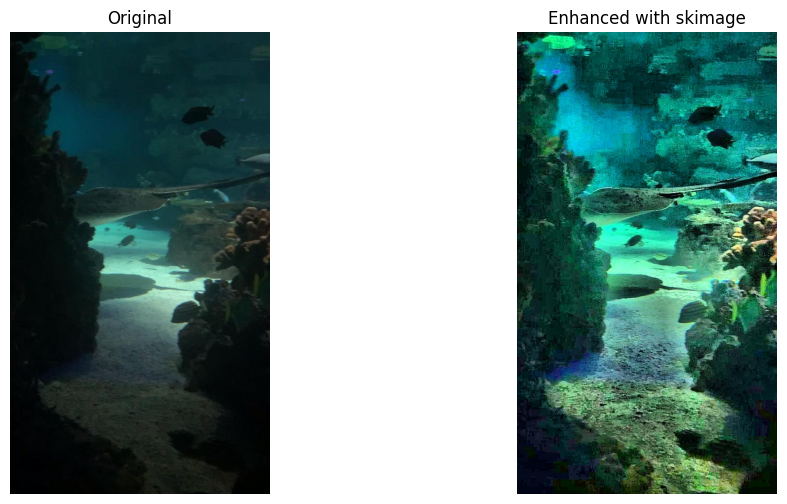

In [11]:
visualize_sample(250)